# **Liver Cirrhosis Prediction**
* *Dataset : Indian Liver Patient Dataset (ILPD)*

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### **What is Liver Cirrhosis?**

* **Scarring of Liver Tissue:** Cirrhosis is characterized by the replacement of healthy liver tissue with scar tissue.
* **Causes:** Common causes include chronic alcoholism, viral hepatitis (B, C, and others), fatty liver disease, and certain genetic conditions.
* **Symptoms:** Symptoms may include fatigue, weakness, easy bruising, swelling in the legs and abdomen, and confusion.
* **Treatment:** While the liver damage caused by cirrhosis is irreversible, early diagnosis and lifestyle changes, along with medical management, can help slow its progression and manage symptoms. In severe cases, a liver transplant may be necessary.


---

#### Data Dictionary


* **Age:** Patient's age.
* **Gender:** Patient's gender.
* Total Bilirubin: The total amount of bilirubin in the blood, a yellow pigment produced by the breakdown of red blood cells.
* **Direct Bilirubin:** The direct fraction of bilirubin, specifically associated with liver function.
* **Total Proteins:** The total amount of proteins in the blood, including albumin and globulins.
* **Albumin:** A protein synthesized by the liver, crucial for maintaining blood volume and pressure.
* **A/G Ratio:** The ratio of albumin to globulins, providing insights into liver and kidney function.
* **SGPT (Serum Glutamic Pyruvic Transaminase):** An enzyme indicating liver health; elevated levels may suggest liver damage.
* **SGOT (Serum Glutamic Oxaloacetic Transaminase):** Another liver enzyme reflecting liver function; elevated levels may indicate liver problems.
* **Alkphos (Alkaline Phosphatase):** An enzyme associated with the biliary system; elevated levels may indicate liver or bone issues.


![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## **Mounting Google Drive**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Importing Libraries and Dataset**



In [2]:
# %pip install imblearn
# %pip install tensorflow
# %pip install prettytable
# %pip install shap

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
from prettytable import PrettyTable

c:\Users\Prasanna Pandhare\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("E:\ML_Project\Indian Liver Patient Dataset (ILPD).csv")

### **Data Description**

In [5]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

---
### **Exploratory Data Analysis (EDA)**
---

* Understanding Distribution of varoius datapoints

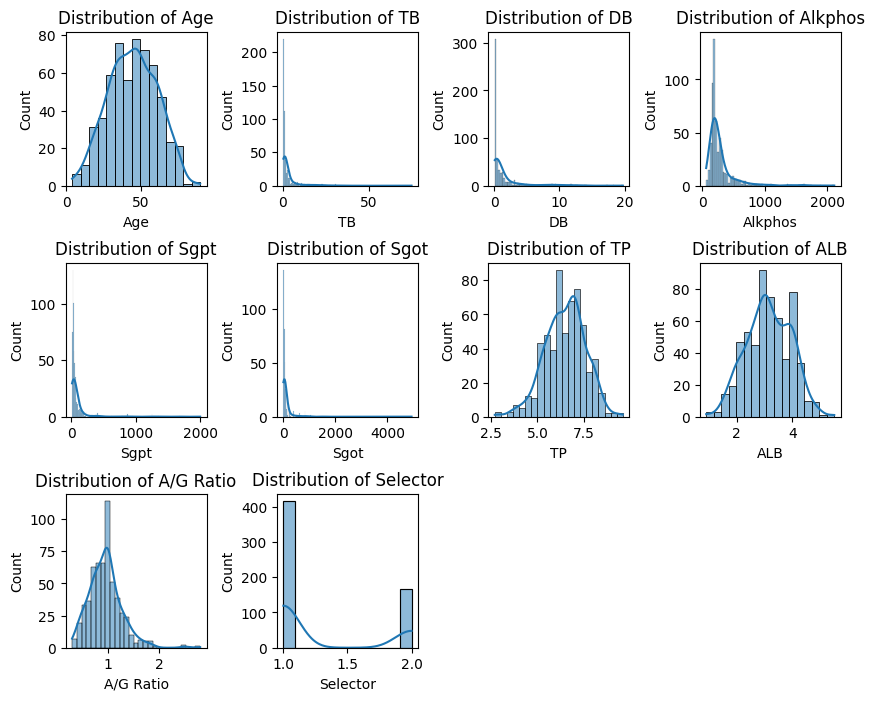

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set spacing between subplots
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns as per your requirement
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

# plt.tight_layout()
plt.show()

* Distribution of Gender ( M / F )

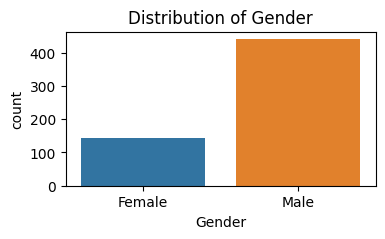

In [10]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

* Correlation Matrix <br>
  * To understand relation between various features

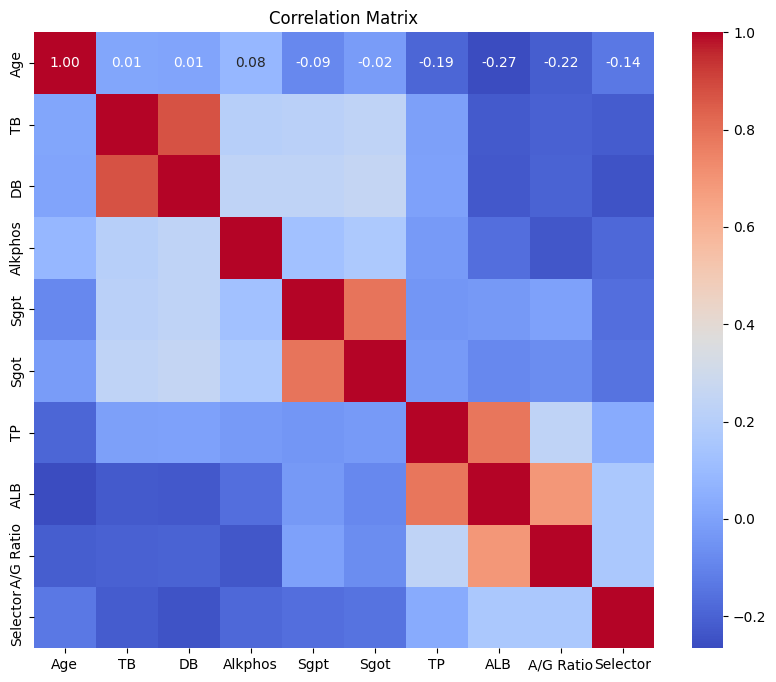

In [11]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

---
### **Replace missing values**
* A/G Ratio with the corresponding ALB values (high correlation)
---

In [12]:
non_null_df = df.dropna(subset=['ALB', 'A/G Ratio'])

# Calculate the correlation between 'ALB' and 'A/G Ratio'
correlation = non_null_df['ALB'].corr(non_null_df['A/G Ratio'])

def fill_agr_missing(row):
    if pd.isnull(row['A/G Ratio']):
        return row['ALB'] * correlation
    return row['A/G Ratio']


df['A/G Ratio'] = df.apply(fill_agr_missing, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


---
### **Smote Resampling for Class Imbalance**
---

c:\Users\Prasanna Pandhare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


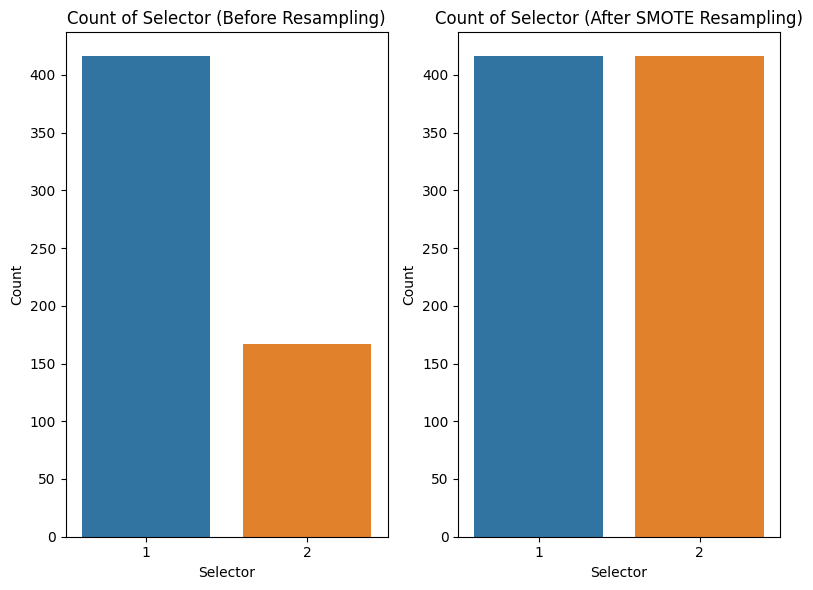

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['Selector'], axis=1)
y = df['Selector']

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X.drop('Gender', axis=1), pd.DataFrame(encoder.fit_transform(X[['Gender']]))], axis=1)

X_encoded.columns = X_encoded.columns.astype(str)

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Selector', data=df)
plt.title('Count of Selector (Before Resampling)')
plt.xlabel('Selector')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Count of Selector (After SMOTE Resampling)')
plt.xlabel('Selector')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

---
## **Models**
---

* Logistic Regression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(classification_report_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

Logistic Regression Metrics:
Accuracy: 0.7784431137724551
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.64      0.72        75
           2       0.75      0.89      0.82        92

    accuracy                           0.78       167
   macro avg       0.79      0.77      0.77       167
weighted avg       0.79      0.78      0.77       167

Confusion Matrix:
[[48 27]
 [10 82]]


* Random Forest

In [16]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_report_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)


Random Forest Metrics:
Accuracy: 0.8323353293413174
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        75
           2       0.86      0.83      0.84        92

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167

Confusion Matrix:
[[63 12]
 [16 76]]


* SVM

In [17]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Metrics:")
print(f'Accuracy: {accuracy_svm}')
print('Classification Report:')
print(classification_report_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)


SVM Metrics:
Accuracy: 0.6946107784431138
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.53      0.61        75
           2       0.68      0.83      0.75        92

    accuracy                           0.69       167
   macro avg       0.70      0.68      0.68       167
weighted avg       0.70      0.69      0.69       167

Confusion Matrix:
[[40 35]
 [16 76]]


* KNN

In [18]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Metrics:")
print(f'Accuracy: {accuracy_knn}')
print('Classification Report:')
print(classification_report_knn)
print('Confusion Matrix:')
print(conf_matrix_knn)


K-Nearest Neighbors Metrics:
Accuracy: 0.7904191616766467
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        75
           2       0.79      0.84      0.81        92

    accuracy                           0.79       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.79      0.79      0.79       167

Confusion Matrix:
[[55 20]
 [15 77]]


* Naive Bayes

In [19]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("\nGaussian Naive Bayes Metrics:")
print(f'Accuracy: {accuracy_nb}')
print('Classification Report:')
print(classification_report_nb)
print('Confusion Matrix:')
print(conf_matrix_nb)


Gaussian Naive Bayes Metrics:
Accuracy: 0.7305389221556886
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.43      0.59        75
           2       0.68      0.98      0.80        92

    accuracy                           0.73       167
   macro avg       0.81      0.70      0.69       167
weighted avg       0.80      0.73      0.70       167

Confusion Matrix:
[[32 43]
 [ 2 90]]


---
## **Model Summary**
---

In [20]:
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
precision_nb = report_nb['weighted avg']['precision']
recall_nb = report_nb['weighted avg']['recall']
f1_nb = report_nb['weighted avg']['f1-score']

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision_knn = report_knn['weighted avg']['precision']
recall_knn = report_knn['weighted avg']['recall']
f1_knn = report_knn['weighted avg']['f1-score']

report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm = report_svm['weighted avg']['precision']
recall_svm = report_svm['weighted avg']['recall']
f1_svm = report_svm['weighted avg']['f1-score']

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_rf = report_rf['weighted avg']['f1-score']

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']
f1_lr = report_lr['weighted avg']['f1-score']


table = PrettyTable()

table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

table.add_row(["Naive Bayes", f'\033[93m{accuracy_nb:.2f}\033[0m', f'\033[91m{precision_nb:.2f}\033[0m', f'\033[92m{recall_nb:.2f}\033[0m', f'\033[94m{f1_nb:.2f}\033[0m'])
table.add_row(["K-Nearest Neighbors", f'\033[93m{accuracy_knn:.2f}\033[0m', f'\033[91m{precision_knn:.2f}\033[0m', f'\033[92m{recall_knn:.2f}\033[0m', f'\033[94m{f1_knn:.2f}\033[0m'])
table.add_row(["SVM", f'\033[93m{accuracy_svm:.2f}\033[0m', f'\033[91m{precision_svm:.2f}\033[0m', f'\033[92m{recall_svm:.2f}\033[0m', f'\033[94m{f1_svm:.2f}\033[0m'])
table.add_row(["Random Forest", f'\033[93m{accuracy_rf:.2f}\033[0m', f'\033[91m{precision_rf:.2f}\033[0m', f'\033[92m{recall_rf:.2f}\033[0m', f'\033[94m{f1_rf:.2f}\033[0m'])
table.add_row(["Logistic Regression", f'\033[93m{accuracy_lr:.2f}\033[0m', f'\033[91m{precision_lr:.2f}\033[0m', f'\033[92m{recall_lr:.2f}\033[0m', f'\033[94m{f1_lr:.2f}\033[0m'])

for field in table.field_names[1:]:
    table.align[field] = "center"

print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
|     Naive Bayes     |   0.73   |    0.80   |  0.73  |   0.70   |
| K-Nearest Neighbors |   0.79   |    0.79   |  0.79  |   0.79   |
|         SVM         |   0.69   |    0.70   |  0.69  |   0.69   |
|    Random Forest    |   0.83   |    0.83   |  0.83  |   0.83   |
| Logistic Regression |   0.78   |    0.79   |  0.78  |   0.77   |
+---------------------+----------+-----------+--------+----------+


---

## **Ensemble Learning**

* Random Forest and KNN

In [21]:
from sklearn.ensemble import VotingClassifier

In [22]:
# Define classifiers
clf_rf = RandomForestClassifier(random_state=42)
clf_knn = KNeighborsClassifier()

# Define the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[
    ('random_forest', clf_rf),
    ('knn', clf_knn)
])

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Predict using the ensemble classifier
y_pred_ensemble = ensemble_clf.predict(X_test)

# Calculate metrics for the ensemble classifier
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_ensemble = classification_report(y_test, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Print metrics for the ensemble classifier
print("\nEnsemble Learning Metrics:")
print(f'Accuracy: {accuracy_ensemble}')
print('Classification Report:')
print(classification_report_ensemble)
print('Confusion Matrix:')
print(conf_matrix_ensemble)



Ensemble Learning Metrics:
Accuracy: 0.8143712574850299
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        75
           2       0.89      0.76      0.82        92

    accuracy                           0.81       167
   macro avg       0.82      0.82      0.81       167
weighted avg       0.82      0.81      0.81       167

Confusion Matrix:
[[66  9]
 [22 70]]


* Combined all model

In [23]:
# Split the data if not already split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers
clf_nb = GaussianNB()
clf_svm = SVC(random_state=42)
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_rf = RandomForestClassifier(random_state=42)
clf_knn = KNeighborsClassifier()

# Train classifiers
clf_nb.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

# Predictions
y_pred_nb = clf_nb.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)
y_pred_lr = clf_lr.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_knn = clf_knn.predict(X_test)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print individual classifier metrics
print("\nGaussian Naive Bayes Metrics:")
print(f'Accuracy: {accuracy_nb}')
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))

print("\nSVM Metrics:")
print(f'Accuracy: {accuracy_svm}')
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))

print("\nLogistic Regression Metrics:")
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

print("\nK-Nearest Neighbors Metrics:")
print(f'Accuracy: {accuracy_knn}')
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

# Ensemble Learning
ensemble_clf = VotingClassifier(estimators=[
    ('naive_bayes', clf_nb),
    ('svm', clf_svm),
    ('logistic_regression', clf_lr),
    ('random_forest', clf_rf),
    ('knn', clf_knn)
])

ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)

# Calculate ensemble metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_ensemble = classification_report(y_test, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Print ensemble metrics
print("\nEnsemble Learning Metrics:")
print(f'Accuracy: {accuracy_ensemble}')
print('Classification Report:')
print(classification_report_ensemble)
print('Confusion Matrix:')
print(conf_matrix_ensemble)



Gaussian Naive Bayes Metrics:
Accuracy: 0.7305389221556886
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.43      0.59        75
           2       0.68      0.98      0.80        92

    accuracy                           0.73       167
   macro avg       0.81      0.70      0.69       167
weighted avg       0.80      0.73      0.70       167

Confusion Matrix:
[[32 43]
 [ 2 90]]

SVM Metrics:
Accuracy: 0.6946107784431138
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.53      0.61        75
           2       0.68      0.83      0.75        92

    accuracy                           0.69       167
   macro avg       0.70      0.68      0.68       167
weighted avg       0.70      0.69      0.69       167

Confusion Matrix:
[[40 35]
 [16 76]]

Logistic Regression Metrics:
Accuracy: 0.7784431137724551
Classification Report:
              precision    recall  f1-sco

* Combined Results for all model and a combined model

In [24]:
# Assuming X_resampled and y_resampled are defined

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
clf_nb = GaussianNB()
clf_svm = SVC(random_state=42)
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_rf = RandomForestClassifier(random_state=42)
clf_knn = KNeighborsClassifier()

# Fit classifiers
clf_nb.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

# Predict using each classifier
y_pred_nb = clf_nb.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)
y_pred_lr = clf_lr.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_knn = clf_knn.predict(X_test)

# Calculate metrics for each classifier
metrics = []
for name, y_pred in zip(['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
                        [y_pred_nb, y_pred_svm, y_pred_lr, y_pred_rf, y_pred_knn]):
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    metrics.append({'Classifier': name,
                    'Accuracy': accuracy,
                    'Precision': classification_rep['weighted avg']['precision'],
                    'Recall': classification_rep['weighted avg']['recall'],
                    'F1-Score': classification_rep['weighted avg']['f1-score'],
                    'Confusion Matrix': confusion_mat})

# Ensemble Learning
ensemble_clf = VotingClassifier(estimators=[
    ('Naive Bayes', clf_nb),
    ('SVM', clf_svm),
    ('Logistic Regression', clf_lr),
    ('Random Forest', clf_rf),
    ('K-Nearest Neighbors', clf_knn)
])

ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_ensemble = classification_report(y_test, y_pred_ensemble, output_dict=True)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Add Ensemble Learning metrics to the table
metrics.append({'Classifier': 'Ensemble Learning',
                'Accuracy': accuracy_ensemble,
                'Precision': classification_report_ensemble['weighted avg']['precision'],
                'Recall': classification_report_ensemble['weighted avg']['recall'],
                'F1-Score': classification_report_ensemble['weighted avg']['f1-score'],
                'Confusion Matrix': conf_matrix_ensemble})
# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

            Classifier  Accuracy  Precision    Recall  F1-Score  \
0          Naive Bayes  0.730539   0.795472  0.730539  0.704411   
1                  SVM  0.694611   0.697979  0.694611  0.686756   
2  Logistic Regression  0.778443   0.786108  0.778443  0.773653   
3        Random Forest  0.832335   0.833920  0.832335  0.832650   
4  K-Nearest Neighbors  0.790419   0.790177  0.790419  0.789578   
5    Ensemble Learning  0.796407   0.818246  0.796407  0.788763   

       Confusion Matrix  
0   [[32, 43], [2, 90]]  
1  [[40, 35], [16, 76]]  
2  [[48, 27], [10, 82]]  
3  [[63, 12], [16, 76]]  
4  [[55, 20], [15, 77]]  
5   [[46, 29], [5, 87]]  


![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **Conclusion :**
* LCP - Liver Cirrhosis Prediction is a ML model that helps in prediction whether patient have Cirrhosis or not.
* Random Forest gives best result of all the model implemented for LCP with accuracy of 83%.
* On Ensemble Learning of KNN and Random Forest model gives result of 81% accuracy.
* When Ensemble Learning is done by combining all 5 model accuracy fall down to 79%.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [25]:
import sklearn
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [26]:
non_null_df = df.dropna(subset=['ALB', 'A/G Ratio'])

# Calculate the correlation between 'ALB' and 'A/G Ratio'
correlation = non_null_df['ALB'].corr(non_null_df['A/G Ratio'])

def fill_agr_missing(row):
    if pd.isnull(row['A/G Ratio']):
        return row['ALB'] * correlation
    return row['A/G Ratio']


df['A/G Ratio'] = df.apply(fill_agr_missing, axis=1)

In [27]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['Selector'], axis=1)
y = df['Selector']

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (example: RandomForestClassifier)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Serialize and save the trained model to a .pkl file
joblib.dump(clf_rf, 'model.pkl')


['model.pkl']

In [28]:
import joblib

# Load the model
model = joblib.load('model.pkl')

# Retrieve scikit-learn version from metadata attribute
scikit_learn_version = getattr(model, 'scikit_learn_version', None)
if scikit_learn_version:
    print("Scikit-learn version used to train the model:", scikit_learn_version)
else:
    print("Scikit-learn version metadata not found in the model.")


Scikit-learn version metadata not found in the model.


### **Prediction Model using Random Forest**

In [29]:
df.head(10)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
# Assuming X_train, y_train, X_test, y_test are already defined

# Train the Random Forest classifier
clf_rf.fit(X_train, y_train)

# Function to predict using the trained model
def predict_result(age, gender, tb, db, alkphos, sgpt, sgot, tp, alb, ag_ratio):
    # Convert gender to numerical value (assuming Male=0, Female=1)
    gender = 1 if gender.lower() == 'female' else 0

    # Create a feature vector from the input values, including the gender feature
    feature_vector = [[age, gender, tb, db, alkphos, sgpt, sgot, tp, alb, ag_ratio]]

    # Predict using the trained model
    result = clf_rf.predict(feature_vector)

    # Return the prediction result
    return result

# Function to get user input and display prediction
def get_user_input_and_predict():
    # Get user input for each feature
    age = int(input("Enter Age: "))
    gender = input("Enter Gender (Male/Female): ")
    tb = float(input("Enter Total Bilirubin (TB): "))
    db = float(input("Enter Direct Bilirubin (DB): "))
    alkphos = int(input("Enter Alkaline Phosphotase (Alkphos): "))
    sgpt = int(input("Enter SGPT: "))
    sgot = int(input("Enter SGOT: "))
    tp = float(input("Enter Total Protiens (TP): "))
    alb = float(input("Enter Albumin (ALB): "))
    ag_ratio = float(input("Enter A/G Ratio: "))

    # Convert gender to numerical value (assuming Male=0, Female=1)
    while gender.lower() not in ['male', 'female']:
        print("Invalid input! Please enter 'Male' or 'Female'.")
        gender = input("Enter Gender (Male/Female): ")

    # Get the prediction result
    result = predict_result(age, gender, tb, db, alkphos, sgpt, sgot, tp, alb, ag_ratio)

    # Display the prediction result
    if result == 1:
        print("The patient is not affected.")
    elif result == 2:
        print("The patient is affected.")

# Call the function to get user input and make prediction
get_user_input_and_predict()

In [ ]:
# Assuming X_train, y_train, clf_rf are defined earlier

# Collect user input for feature values
age = int(input("Enter Age: "))
gender = input("Enter Gender (Male/Female): ").capitalize()  # Convert input to capitalize first letter
tb = float(input("Enter Total Bilirubin (TB): "))
db = float(input("Enter Direct Bilirubin (DB): "))
alkphos = int(input("Enter Alkaline Phosphotase (Alkphos): "))
sgpt = int(input("Enter SGPT: "))
sgot = int(input("Enter SGOT: "))
tp = float(input("Enter Total Protein (TP): "))
alb = float(input("Enter Albumin (ALB): "))
ag_ratio = float(input("Enter A/G Ratio: "))

# Convert Gender to binary (0 for Male, 1 for Female)
gender_binary = 0 if gender == 'Male' else 1

# Create feature vector
user_features = [[age, gender_binary, tb, db, alkphos, sgpt, sgot, tp, alb, ag_ratio]]

# Predict using the trained model
prediction = clf_rf.predict(user_features)

# Print prediction
if prediction[0] == 0:
    print("The model predicts False (Not affected)")
else:
    print("The model predicts True (Affected)")


---